In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import zipfile

In [ ]:
#Downloading the CSV directly from the web using wget tool in colab kernel
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" --quiet

In [ ]:
!mv iris.data iris.csv

In [ ]:
#for readable figures
pd.set_option('float_format','{:f}'.format)
iris=pd.read_csv("iris.csv")

In [ ]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.900000,3.000000,1.400000,0.200000,Iris-setosa
1,4.700000,3.200000,1.300000,0.200000,Iris-setosa
2,4.600000,3.100000,1.500000,0.200000,Iris-setosa
3,5.000000,3.600000,1.400000,0.200000,Iris-setosa
4,5.400000,3.900000,1.700000,0.400000,Iris-setosa


In [ ]:
x=iris.drop('Iris-setosa',axis=1)
y=iris['Iris-setosa']
trainX, testX, trainY, testY = train_test_split(x,y, test_size=0.2)


In [ ]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX,trainY)
y_pred= log_reg.predict(testX)
#model validation
print('Accuracy:{:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate:{:.2f}'.format(1 - accuracy_score(testY, y_pred)))


Accuracy:0.97
Error rate:0.03


In [ ]:
clf = LogisticRegression(solver='newton-cg',multi_class='multinomial')
scores = cross_val_score(clf, trainX , trainY, cv=5)
scores

array([0.95833333, 1.        , 1.        , 0.91666667, 0.95652174])

In [ ]:
#Look at the confusion matrix:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)


[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


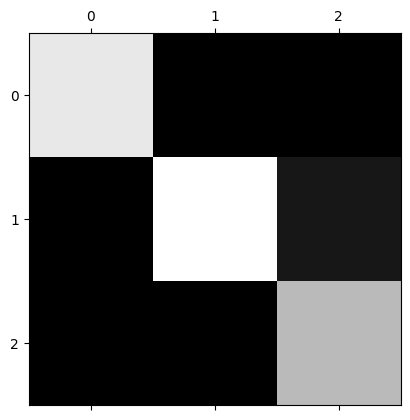

In [ ]:
#If you have many variables, it makes sense to plot the confusion matrix
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [ ]:
#calculates probabilities
#get the probabiliteis of the predicted classes
probability= log_reg.predict_proba(testX)
probability

array([[7.06079070e-03, 8.33637836e-01, 1.59301373e-01],
       [9.74007096e-01, 2.59928671e-02, 3.66371503e-08],
       [2.84788462e-03, 7.73296552e-01, 2.23855564e-01],
       [9.69190394e-01, 3.08094787e-02, 1.27613628e-07],
       [9.80714768e-01, 1.92851588e-02, 7.32887462e-08],
       [2.09464740e-03, 4.46061485e-01, 5.51843867e-01],
       [9.77461262e-01, 2.25386275e-02, 1.10858157e-07],
       [2.17526230e-02, 9.43103901e-01, 3.51434759e-02],
       [3.68308873e-04, 1.80763556e-01, 8.18868135e-01],
       [1.66767607e-01, 8.28551140e-01, 4.68125306e-03],
       [9.44023297e-01, 5.59760208e-02, 6.82229702e-07],
       [1.06404794e-02, 9.14806549e-01, 7.45529716e-02],
       [2.07429575e-04, 1.78326569e-01, 8.21466001e-01],
       [3.25774483e-02, 9.08497959e-01, 5.89245930e-02],
       [6.26403325e-03, 8.99524903e-01, 9.42110640e-02],
       [1.49269710e-05, 3.68520333e-02, 9.63133040e-01],
       [3.65487010e-03, 8.91345229e-01, 1.04999901e-01],
       [9.84248251e-01, 1.57516

In [ ]:
print(probability.shape[0])
print(testX.shape[0])

30
30


In [ ]:
df=pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.007061,0.833638,0.159301
1,0.974007,0.025993,0.000000
2,0.002848,0.773297,0.223856
3,0.969190,0.030809,0.000000
4,0.980715,0.019285,0.000000


In [ ]:
df['sum'] = df.sum(axis=1)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum
0,0.007061,0.833638,0.159301,1.000000
1,0.974007,0.025993,0.000000,1.000000
2,0.002848,0.773297,0.223856,1.000000
3,0.969190,0.030809,0.000000,1.000000
4,0.980715,0.019285,0.000000,1.000000


In [ ]:
# Actual_classes:
df['predicted_class']= y_pred
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class
0,0.007061,0.833638,0.159301,1.000000,Iris-versicolor
1,0.974007,0.025993,0.000000,1.000000,Iris-setosa
2,0.002848,0.773297,0.223856,1.000000,Iris-versicolor
3,0.969190,0.030809,0.000000,1.000000,Iris-setosa
4,0.980715,0.019285,0.000000,1.000000,Iris-setosa


In [ ]:
#Actual classes:
df['actual_class']= testY.to_frame().reset_index().drop(columns='index')
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,Actual_classes,label_pred,actual_class
0,0.007061,0.833638,0.159301,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor
1,0.974007,0.025993,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa
2,0.002848,0.773297,0.223856,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor
3,0.969190,0.030809,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa
4,0.980715,0.019285,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa


In [ ]:
# Do a plausibiility check whether the classes wer predicted correctly.
le= preprocessing.LabelEncoder()
df['label_pred'] =le.fit_transform(df['predicted_class'])
df['label_actual']= le.fit_transform(df['actual_class'])
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,Actual_classes,label_pred,actual_class,label_actual
0,0.007061,0.833638,0.159301,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor,1
1,0.974007,0.025993,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0
2,0.002848,0.773297,0.223856,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor,1
3,0.969190,0.030809,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0
4,0.980715,0.019285,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0


In [ ]:
targets=df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'Iris-versicolor': 1, 'Iris-setosa': 0, 'Iris-virginica': 2}

In [ ]:
targets= df['actual_class']
integerEncoded=le.fit_transform(targets)
integerMapping= dict(zip(targets, integerEncoded))
integerMapping

{'Iris-versicolor': 1, 'Iris-setosa': 0, 'Iris-virginica': 2}

In [ ]:
#plausibility check whether the classes were predicted correctly.
#If the result of substraction is 0, it was a correct esimate of the model
df['check']=df['label_actual']-df['label_pred']
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,Actual_classes,label_pred,actual_class,label_actual,check
0,0.007061,0.833638,0.159301,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor,1,0
1,0.974007,0.025993,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0,0
2,0.002848,0.773297,0.223856,1.000000,Iris-versicolor,Iris-versicolor,1,Iris-versicolor,1,0
3,0.969190,0.030809,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0,0
4,0.980715,0.019285,0.000000,1.000000,Iris-setosa,Iris-setosa,0,Iris-setosa,0,0


In [ ]:
''' For better orientatopm. we give the observation descriptive names and
 delete unnecessary columns'''
df['correct_prediction']= np.where(df['check']==0,'True','False')
df=df.drop(['label_pred', 'label_actual','check'],axis=1)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,Actual_classes,actual_class,correct_prediction
0,0.007061,0.833638,0.159301,1.000000,Iris-versicolor,Iris-versicolor,Iris-versicolor,True
1,0.974007,0.025993,0.000000,1.000000,Iris-setosa,Iris-setosa,Iris-setosa,True
2,0.002848,0.773297,0.223856,1.000000,Iris-versicolor,Iris-versicolor,Iris-versicolor,True
3,0.969190,0.030809,0.000000,1.000000,Iris-setosa,Iris-setosa,Iris-setosa,True
4,0.980715,0.019285,0.000000,1.000000,Iris-setosa,Iris-setosa,Iris-setosa,True


In [ ]:
true_predictions = df[(df["correct_prediction"]=='True')].shape[0]
false_predictions = df[(df["correct_prediction"]=='False')].shape[0]
total = df['correct_prediction'].shape[0]
print('manual calculated Accuracy is:',(true_predictions/ total *100))


manual calculated Accuracy is: 96.66666666666667


In [ ]:
#take finally a look at the probabilities of the mispredicted classes
wrong_pred = df [(df["correct_prediction"]=='False')]
wrong_pred

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,Actual_classes,actual_class,correct_prediction
24,0.000627,0.335404,0.663969,1.000000,Iris-virginica,Iris-versicolor,Iris-versicolor,False


In [ ]:
'''to ge the p-values of the model created above we have to use the statmodel
library again '''
x=iris.drop('Iris-setosa',axis=1)
y=iris['Iris-setosa']
x = sm.add_constant(x, prepend=False)
mnlogit_mod=sm.MNLogit(y, x)
mnlogit_fit= mnlogit_mod.fit()

         Current function value: 0.039928
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print (mnlogit_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:            Iris-setosa   No. Observations:                  149
Model:                        MNLogit   Df Residuals:                      139
Method:                           MLE   Df Model:                            8
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.9637
Time:                        07:13:07   Log-Likelihood:                -5.9493
converged:                      False   LL-Null:                       -163.69
Covariance Type:            nonrobust   LLR p-value:                 2.087e-63
Iris-setosa=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
5.1                            -5.4863   3.59e+05  -1.53e-05      1.000   -7.04e+05    7.04e+05
3.5                           -10.7834    1.9e+05  -5.69e-05      1.000   -3.72e